# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset(s)

In [2]:
gold_data = pd.read_csv('../Data/FINAL_USO.xls')
vix_data = pd.read_csv('../Data/VVIX_History.csv')
# Renaming to just be one word
gold_data.rename(columns={"Adj Close": "Adj_close"}, inplace=True)
gold_data.rename(columns={"USO_Adj Close": "USO_Ajclose"}, inplace=True)
gold_data.rename(columns={"GDX_Adj Close": "GDX_Ajclose"}, inplace=True)


# Data Preprocessing

In [3]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1718 non-null   object 
 1   Open         1718 non-null   float64
 2   High         1718 non-null   float64
 3   Low          1718 non-null   float64
 4   Close        1718 non-null   float64
 5   Adj_close    1718 non-null   float64
 6   Volume       1718 non-null   int64  
 7   SP_open      1718 non-null   float64
 8   SP_high      1718 non-null   float64
 9   SP_low       1718 non-null   float64
 10  SP_close     1718 non-null   float64
 11  SP_Ajclose   1718 non-null   float64
 12  SP_volume    1718 non-null   int64  
 13  DJ_open      1718 non-null   float64
 14  DJ_high      1718 non-null   float64
 15  DJ_low       1718 non-null   float64
 16  DJ_close     1718 non-null   float64
 17  DJ_Ajclose   1718 non-null   float64
 18  DJ_volume    1718 non-null   int64  
 19  EG_ope

In [4]:
print(gold_data.isnull().sum())

Date           0
Open           0
High           0
Low            0
Close          0
              ..
USO_High       0
USO_Low        0
USO_Close      0
USO_Ajclose    0
USO_Volume     0
Length: 81, dtype: int64


In [5]:
gold_data.describe()

,Open,High,Low,Close,Adj_close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Ajclose,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Ajclose,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [6]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

vix_data = vix_data.rename(columns={'DATE': 'Date'})
vix_data['Date'] = pd.to_datetime(vix_data['Date'])
vix_data.set_index('Date', inplace=True)

In [7]:
start_date = gold_data.index.min()
end_date = gold_data.index.max()

vix_data_filtered = vix_data[(vix_data.index >= start_date) & (vix_data.index <= end_date)]
gold_data.join(vix_data_filtered, how='outer')

,Open,High,Low,Close,Adj_close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Close,GDX_Ajclose,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Ajclose,USO_Volume,VVIX
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900.0,123.029999,123.199997,121.989998,122.180000,...,51.680000,48.973877,20605600.0,36.900002,36.939999,36.049999,36.130001,36.130001,12616700.0,97.71
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300.0,122.230003,122.949997,121.300003,121.589996,...,52.680000,49.921513,16285400.0,36.180000,36.500000,35.730000,36.270000,36.270000,12578800.0,94.28
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200.0,122.059998,122.320000,120.029999,120.290001,...,51.169998,48.490578,15120200.0,36.389999,36.450001,35.930000,36.200001,36.200001,7418200.0,90.27
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300.0,122.180000,124.139999,120.370003,123.930000,...,52.990002,50.215282,11644900.0,37.299999,37.610001,37.220001,37.560001,37.560001,10041600.0,88.64
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100.0,123.930000,124.360001,122.750000,124.169998,...,52.959999,50.186852,8724300.0,37.669998,38.240002,37.520000,38.110001,38.110001,10728000.0,85.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400.0,239.039993,240.839996,234.270004,234.339996,...,21.090000,21.090000,60507000.0,9.490000,9.520000,9.280000,9.290000,9.290000,21598200.0,111.88
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500.0,235.970001,246.179993,233.759995,246.179993,...,20.620001,20.620001,76365200.0,9.250000,9.920000,9.230000,9.900000,9.900000,40978800.0,97.32
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400.0,242.570007,248.289993,238.960007,248.070007,...,20.969999,20.969999,52393000.0,9.590000,9.650000,9.370000,9.620000,9.620000,36578700.0,95.89


<Figure size 1000x500 with 0 Axes>

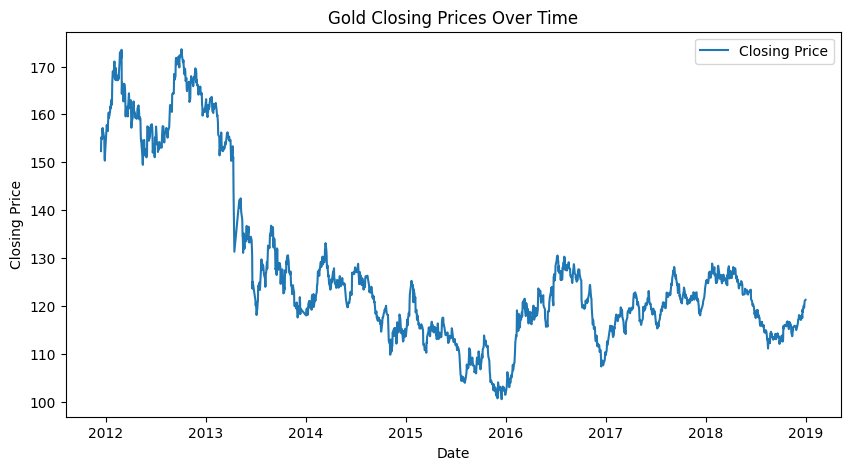

In [8]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Close'], label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

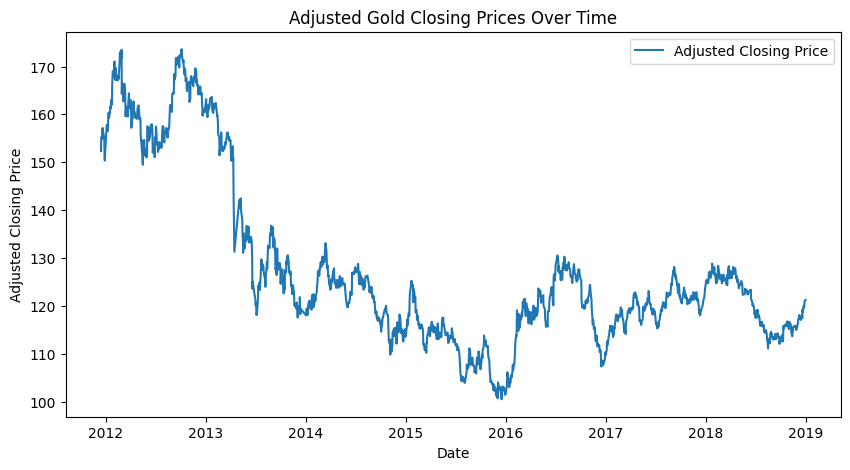

In [9]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Adj_close'], label='Adjusted Closing Price')
plt.title('Adjusted Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

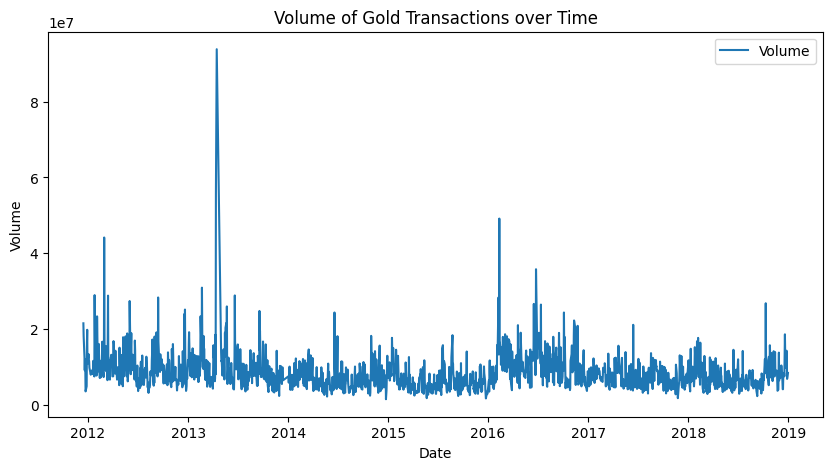

In [10]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Volume'], label='Volume')
plt.title('Volume of Gold Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

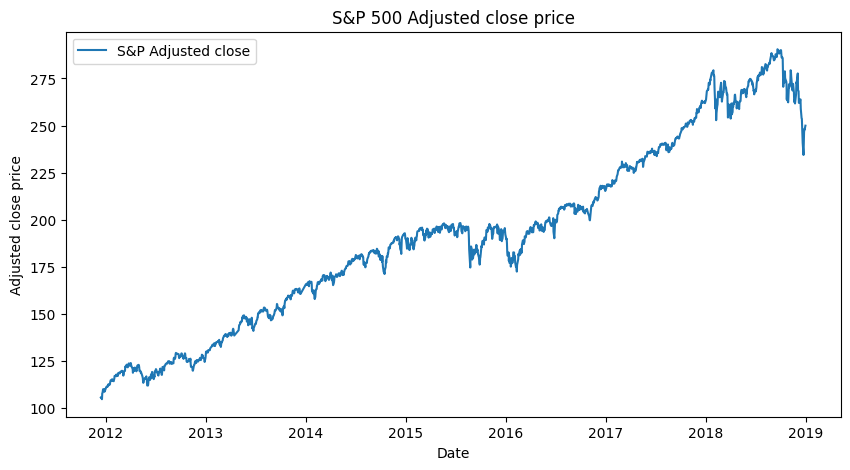

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(gold_data['SP_Ajclose'], label='S&P Adjusted close')
plt.title('S&P 500 Adjusted close price')
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.legend()
plt.show()

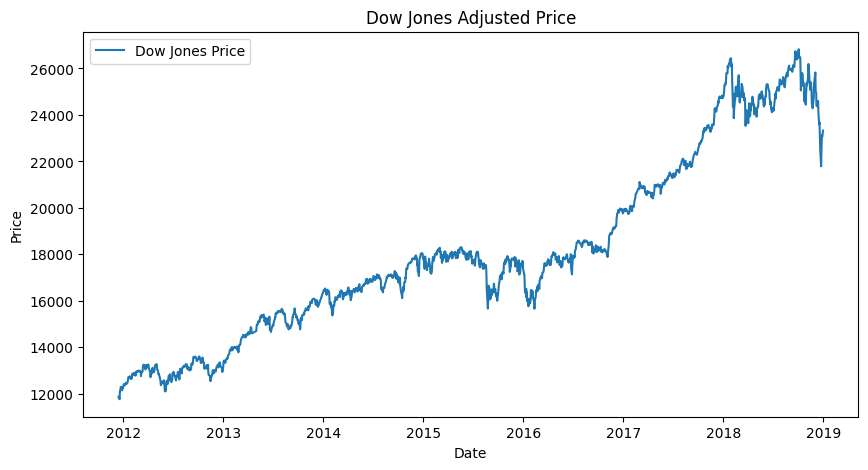

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(gold_data['DJ_Ajclose'], label='Dow Jones Price')
plt.title('Dow Jones Adjusted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
##Computing daily percentage returns on assets, Absolute returns on assets, and rolling averages

def feature_engineer(data, feature):
    df = data[feature]
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0

    absolute_return = (df - df.shift(1)) 
    absolute_return[0] = 0

    three_day_ave = df.rolling(window=3).mean().fillna(0)
    week_ave = df.rolling(window=5).mean().fillna(0)
    month_ave = df.rolling(window=30).mean().fillna(0)
    week_var = df.rolling(window = 5).var().fillna(0)
    month_var = df.rolling(window = 30).var().fillna(0)
    engineered_features = pd.DataFrame({f"{feature}_pret": daily_return,f"{feature}_aret" :absolute_return, f"{feature}_three_ave":three_day_ave, f"{feature}_week_ave": week_ave, f"{feature}_month_ave": month_ave, f"{feature}_week_var": week_var, f"{feature}_month_var": month_var})
    return engineered_features


import_asset_list = [
    "Adj_close", "SP_Ajclose","DJ_Ajclose","EG_Ajclose","USO_Ajclose","EU_Price","OF_Price","OS_Price","SF_Price","USB_Price","PLT_Price","PLD_Price","USDI_Price","GDX_Ajclose"
]

for asset in import_asset_list :
    temp = feature_engineer(gold_data, asset)
    gold_data = pd.concat([gold_data,temp], axis=1)


feature_list = list(gold_data.columns)


duplicates = [item for item in set(feature_list) if feature_list.count(item) > 1]
print(duplicates)
gold_data.shape

[]


(1718, 178)

['Adj_close_pret', 'SP_Ajclose_pret', 'DJ_Ajclose_pret', 'EG_Ajclose_pret', 'USO_Ajclose_pret', 'EU_Price_pret', 'OF_Price_pret', 'OS_Price_pret', 'SF_Price_pret', 'USB_Price_pret', 'PLT_Price_pret', 'PLD_Price_pret', 'USDI_Price_pret', 'GDX_Ajclose_pret']
plotting Adj_close_pret
plotting SP_Ajclose_pret
plotting DJ_Ajclose_pret
plotting EG_Ajclose_pret
plotting USO_Ajclose_pret
plotting EU_Price_pret
plotting OF_Price_pret
plotting OS_Price_pret
plotting SF_Price_pret
plotting USB_Price_pret
plotting PLT_Price_pret
plotting PLD_Price_pret
plotting USDI_Price_pret
plotting GDX_Ajclose_pret


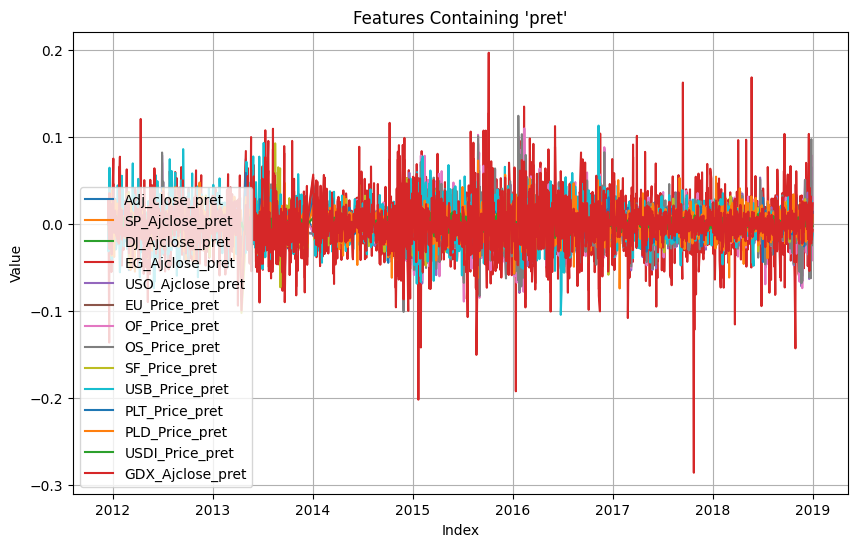

In [14]:
pret_columns = [col for col in gold_data.columns if "pret" in col]

print(pret_columns)
plt.figure(figsize=(10, 6))  
for col in pret_columns:
    plt.plot(gold_data.index, gold_data[col], label=col)  
    print(f"plotting {col}")


plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Features Containing 'pret'")
plt.legend()
plt.grid(True)
plt.show()

**Train/test split**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Normalize the data


predictors = [
    'Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'SP_open',
    'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
    'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
    'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
    'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
    'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
    'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
    'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
    'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
    'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Trend',
    'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low',
    'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High', 'GDX_Low',
    'GDX_Close', 'GDX_Ajclose', 'GDX_Volume', 'USO_Open', 'USO_High',
    'USO_Low', 'USO_Close', 'USO_Ajclose', 'USO_Volume'
]
reg_data = gold_data
gold_data[predictors] = gold_data[predictors].fillna(0)
gold_data[predictors] = scaler.fit_transform(gold_data[predictors])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = gold_data.drop(columns=['Adj_close', 'Close'])
y = gold_data['Adj_close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (1374, 176)
Testing Features Shape: (344, 176)
Training Target Shape: (1374,)
Testing Target Shape: (344,)


**Models**


First we try to run simple models to get a hold of what works and what doesn't. We are trying out two scenarios: Price-prediction and binary pridiction predicting if the price goes up or down. 


**Vanilla models**


Regression models: predicting the actual *price*

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [19]:
# assumed labelling: X_train, y_train; X_test, y_test

regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42),
}

regression_results = {}

# Training and evaluating regression models:
for name, model in regression_models.items():
    print(f"Training {name} for price prediction...")
    
    # Fit/train the model
    model.fit(X_train, y_train)
    
    # Predicting using the test set
    y_test_pred_REG = model.predict(X_test)
    
    # Calculate RMSE (Root mean square error)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_REG))
    regression_results[name] = rmse
    
    print(f"{name} RMSE: {rmse}")

# print results in RMSE
print("\nRegression RMSE for Each Model:")
for model_name, rmse_score in regression_results.items():
    print(f"{model_name}: {rmse_score}")


Training Linear Regression for price prediction...
Linear Regression RMSE: 0.009931610220537743
Training Random Forest for price prediction...
Random Forest RMSE: 0.03217186335612578
Training Gradient Boosting for price prediction...
Gradient Boosting RMSE: 0.027729066039059273
Training XGBoost for price prediction...
XGBoost RMSE: 0.037420283649657486

Regression RMSE for Each Model:
Linear Regression: 0.009931610220537743
Random Forest: 0.03217186335612578
Gradient Boosting: 0.027729066039059273
XGBoost: 0.037420283649657486


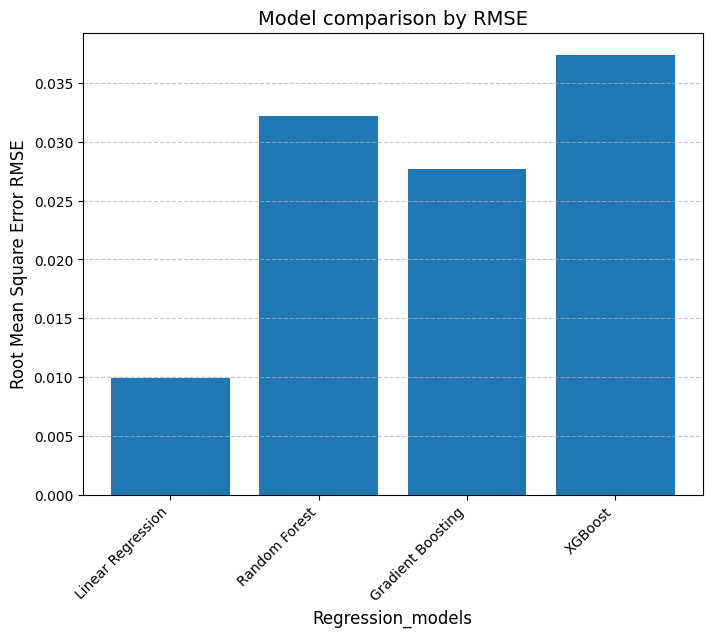

In [20]:
plt.figure(figsize=(8,6))
plt.bar(list(regression_results.keys()), list(regression_results.values()))

plt.xlabel('Regression_models', fontsize=12)
plt.ylabel('Root Mean Square Error RMSE', fontsize=12)
plt.title('Model comparison by RMSE', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [21]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [22]:
import optuna
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe
# Replace 'target_column' with the actual column name
X = reg_data.drop(columns=['Adj_close', 'Close']).values
y = reg_data['Adj_close'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

# Define the LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]  # Take the last time step
        output = self.fc(lstm_out)
        return output

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    hidden_dim = trial.suggest_int("hidden_dim", 16, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    # Prepare data loaders
    train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Initialize the model
    model = LSTMModel(input_dim=X_train_tensor.shape[2], hidden_dim=hidden_dim, 
                      output_dim=1, num_layers=num_layers, dropout=dropout).to(device)

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    model.train()
    for epoch in range(20):  # Fixed number of epochs for each trial
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            y_pred = model(batch_X).squeeze()
            loss = criterion(y_pred, batch_y)
            loss.backward()
            optimizer.step()

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor.to(device)).squeeze()
        rmse = np.sqrt(mean_squared_error(y_test_tensor.cpu().numpy(), y_test_pred.cpu().numpy()))

    return rmse

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best hyperparameters
print("Best hyperparameters:", study.best_params)

# Train final model with best hyperparameters
best_params = study.best_params
final_model = LSTMModel(
    input_dim=X_train_tensor.shape[2],
    hidden_dim=best_params["hidden_dim"],
    output_dim=1,
    num_layers=best_params["num_layers"],
    dropout=best_params["dropout"]
).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params["learning_rate"])

train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=best_params["batch_size"], shuffle=True)

# Train the final model
final_model.train()
for epoch in range(50):  # Longer training for the final model
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        y_pred = final_model(batch_X).squeeze()
        loss = criterion(y_pred, batch_y)
        loss.backward()
        optimizer.step()

# Evaluate final model
final_model.eval()
with torch.no_grad():
    y_test_pred = final_model(X_test_tensor.to(device)).squeeze()
    final_rmse = np.sqrt(mean_squared_error(y_test_tensor.cpu().numpy(), y_test_pred.cpu().numpy()))

print(f"Final RMSE: {final_rmse}")


[I 2024-12-10 17:06:52,250] A new study created in memory with name: no-name-8b1d3b8e-2837-4f97-bb82-6c7e16f96607
[I 2024-12-10 17:06:58,403] Trial 0 finished with value: 0.09813559192541538 and parameters: {'hidden_dim': 122, 'num_layers': 1, 'dropout': 0.27580235993729496, 'learning_rate': 0.00010845024484656897, 'batch_size': 16}. Best is trial 0 with value: 0.09813559192541538.
[I 2024-12-10 17:07:03,642] Trial 1 finished with value: 0.0930853519189163 and parameters: {'hidden_dim': 52, 'num_layers': 1, 'dropout': 0.2927599899627704, 'learning_rate': 0.00017714132821709585, 'batch_size': 16}. Best is trial 1 with value: 0.0930853519189163.
[I 2024-12-10 17:07:07,699] Trial 2 finished with value: 0.7658295260913454 and parameters: {'hidden_dim': 65, 'num_layers': 2, 'dropout': 0.16180430706069535, 'learning_rate': 0.0001052676009681104, 'batch_size': 32}. Best is trial 1 with value: 0.0930853519189163.
[I 2024-12-10 17:07:15,423] Trial 3 finished with value: 0.15236369638199396 and 

Best hyperparameters: {'hidden_dim': 115, 'num_layers': 1, 'dropout': 0.3106738246583618, 'learning_rate': 0.0026686366342638795, 'batch_size': 16}
Final RMSE: 0.042453890466177306


In [23]:
##Lasso, Ridge, and SGD Models
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor

##Lasso
lasso = LassoCV(n_alphas=1000, max_iter=3000)
#ridge = RidgeCV(gcv_mode='auto')

lasso_model = lasso.fit(X_train,y_train)
predicted = lasso_model.predict(X_test)
RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE: ', RSME_score)
    


##Ridge 

ridge = RidgeCV(gcv_mode='auto')

ridge_model = lasso.fit(X_train,y_train)
predicted = lasso_model.predict(X_test)
RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE: ', RSME_score)
    


##SGD
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_trained = sgd.fit(X_train,y_train)
predicted = sgd_trained.predict(X_test)
RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE: ', RSME_score)
    


RMSE:  0.35600324804370015
RMSE:  0.35600324804370015
RMSE:  2.197783635443961e+21


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define models and their hyperparameter grids
'''models_with_params = {
    GradientBoostingRegressor(random_state=42): {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'min_samples_split': [2, 5, 10], # Controls the minimum number of samples needed to split an internal node, which helps reduce overfitting by limiting the growth of the tree.
        'min_samples_leaf': [1, 2, 4] # Sets the minimum number of samples required to be in a leaf node, enforcing sparsity and acting as a form of regularization by preventing overly small leaves.
    },
    XGBRegressor(random_state=42, objective='reg:squarederror'): {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'alpha': [0, 0.1, 0.5, 1, 5],   # L1 regularization (Lasso parameter)
        'lambda': [0, 1, 2, 5, 10],    # L2 regularization (Ridge parameter)
        'subsample': [0.6, 0.8, 1.0]
    }
}'''








'''# Store results
Hyperparameter_search_results = {}

# Loop through models and hyperparameters
for model, param_grid in models_with_params.items():
    model_name = model.__class__.__name__
    print(f"Tuning {model_name}...")

    # Grid search
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3) # note-to-self: tweak cv for potential better results
    grid_search.fit(X_train, y_train)

    # Best model and evaluation
    best_model = grid_search.best_estimator_
    best_parameters = grid_search.best_params_
    y_test_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Save results
    Hyperparameter_search_results[model_name] = {'RMSE': rmse, 'Best Parameters': best_parameters}
    print(f"{model_name} RMSE: {rmse:.3f}, Best Parameters: {best_parameters}")'''

# Display results
print("\nFinal Results:")
for model_name, results in Hyperparameter_search_results.items():
    print(f"{model_name}: RMSE = {results['RMSE']:.3f}, Best Parameters = {results['Best Parameters']}")
best_found_gradient = GradientBoostingRegressor(learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
best_found_gradient.fit(X_train,y_train)
y_test_pred_g = best_found_gradient.predict(X_test)
best_found_xgb = XGBRegressor(alpha=0, lambda_=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8)
best_found_xgb.fit(X_train,y_train)
y_test_pred_x = best_found_xgb.predict(X_test)
print(f"Best gradient params found: {best_found_gradient.get_params} RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred_g))}")
print(f"Best xgboost params found: {best_found_xgb.get_params} RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred_x))}")


Final Results:
Best gradient params found: <bound method BaseEstimator.get_params of GradientBoostingRegressor(learning_rate=0.01, max_depth=7, min_samples_leaf=2,
                          min_samples_split=5)> RMSE: 0.5006410712530108
Best xgboost params found: <bound method XGBModel.get_params of XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda_=0, learning_rate=0.01,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=No

Classification models:
Predicting *up* or *down*

In [24]:
# Creting a new y_train and test.

# copy data
class_data = gold_data

In [25]:
# rearrange opening price to correct col
class_data['next_day_open'] = class_data['Open'].shift(-1)

# Calculate difference
class_data['price_diff'] = class_data['Adj_close'] - class_data['next_day_open']

# Create new bin-feature
class_data['up_or_down'] = (class_data['price_diff'] > 0).astype(int)

# Clean-up 
class_data.drop(columns=['next_day_open', 'price_diff'], inplace=True)

# Print and check
print(class_data[['Adj_close', 'up_or_down']].head())


            Adj_close  up_or_down
Date                             
2011-12-15   1.426632           0
2011-12-16   1.592051           0
2011-12-19   1.571516           0
2011-12-20   1.691874           0
2011-12-21   1.702141           1


**New train/test split:** 

In [26]:
X = class_data.drop(columns=['up_or_down'])
y = class_data['up_or_down']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (1374, 178)
Testing Features Shape: (344, 178)
Training Target Shape: (1374,)
Testing Target Shape: (344,)


In [27]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
# assumed labelling: X_train, y_train; X_test, y_test

classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, use_label_encoder=False, random_state=42),
}

classification_results = {}

# Training and evaluating classification models:
for name, model in classification_models.items():
    print(f"Training {name} for direction prediction...")
    
    # Fit/train the model
    model.fit(X_train, y_train)
    
    # Predicting using the test set
    y_test_pred_CLASS = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred_CLASS)
    classification_results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.2%}")

# Print results
print("\nClassification Accuracy for Each Model:")
for model_name, accuracy_score in classification_results.items():
    print(f"{model_name}: {accuracy_score:.2%}")


Training Logistic Regression for direction prediction...
Logistic Regression Accuracy: 50.29%
Training Random Forest for direction prediction...
Random Forest Accuracy: 54.07%
Training Gradient Boosting for direction prediction...
Gradient Boosting Accuracy: 53.78%
Training XGBoost for direction prediction...
XGBoost Accuracy: 53.78%

Classification Accuracy for Each Model:
Logistic Regression: 50.29%
Random Forest: 54.07%
Gradient Boosting: 53.78%
XGBoost: 53.78%


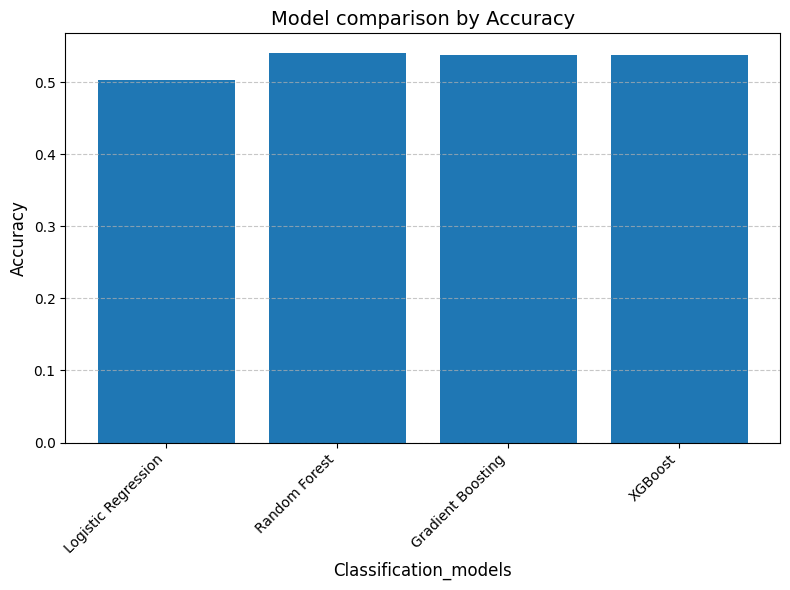

In [29]:
plt.figure(figsize=(8,6))
plt.bar(list(classification_results.keys()), list(classification_results.values()))

plt.xlabel('Classification_models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model comparison by Accuracy', fontsize=14)
plt.xticks(rotation=45, ha= 'right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()